<H3 align="center">TEAM CRESCENDO<H3>
<H3 align="center"> MILESTONE 2 - EDA ON DATA <H3>
<h4>Link to the dataset-  https://www.kaggle.com/datasets/grassknoted/asl-alphabet<h4>

#### Importing the required libraries

In [2]:
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

import numpy as np
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
from matplotlib import pyplot as plt
%matplotlib inline
from collections import Counter
from keras.preprocessing.image import ImageDataGenerator 
from numpy import asarray

### Extracting dataset

In [3]:
# Reading the image data from the directory using the generator object
generator = ImageDataGenerator(rescale=1./255)

print("For training: ")
train_generator = generator.flow_from_directory(directory="../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train",color_mode='rgb', seed=1, batch_size=64, class_mode='categorical')

print("*"*20)

print("For testing: ")
test_generator = generator.flow_from_directory(directory="../input/asl-alphabet/asl_alphabet_test", target_size=(128, 128), color_mode='rgb', seed=1, batch_size=16, class_mode='categorical')

For training: 
Found 87000 images belonging to 29 classes.
********************
For testing: 
Found 28 images belonging to 1 classes.


### EDA on train set

In [4]:
# Getting the mappings of class in training data
class_mappings = train_generator.class_indices
class_mappings

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [5]:
# Getting the number of images available for each class in training set
counter = Counter(train_generator.classes)
class_counts_train= dict(counter)
class_counts_train

{0: 3000,
 1: 3000,
 2: 3000,
 3: 3000,
 4: 3000,
 5: 3000,
 6: 3000,
 7: 3000,
 8: 3000,
 9: 3000,
 10: 3000,
 11: 3000,
 12: 3000,
 13: 3000,
 14: 3000,
 15: 3000,
 16: 3000,
 17: 3000,
 18: 3000,
 19: 3000,
 20: 3000,
 21: 3000,
 22: 3000,
 23: 3000,
 24: 3000,
 25: 3000,
 26: 3000,
 27: 3000,
 28: 3000}

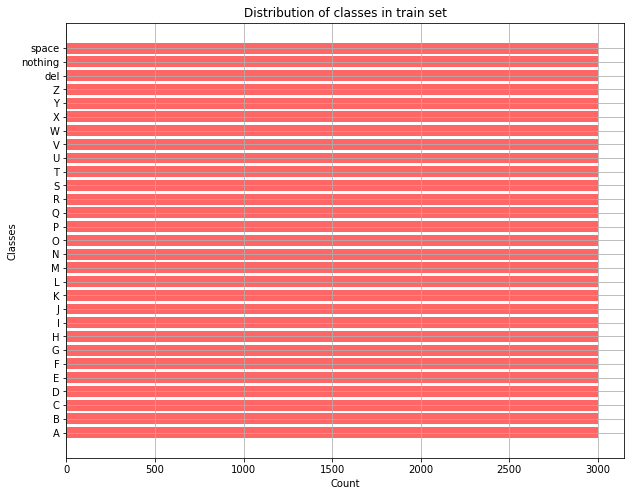

In [6]:
# Checking the distribution of classes in train set
classes = list(class_mappings.keys())
freq_count = list(class_counts_train.values())

# Plotting a bar chart
plt.figure(figsize=(10,8))
plt.barh(range(len(freq_count)), freq_count, tick_label=classes,
        color = 'r' , alpha = 0.6)
plt.xlabel("Count")
plt.ylabel("Classes")
plt.title('Distribution of classes in train set')
plt.grid()
plt.show()

#### As seen from the above plot, each class in training set has 3000 images available, making it a balanced dataset. 

There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE, and NOTHING. These 3 classes are very helpful in real-time applications and classification.

In [7]:
# Printing the target size of the image
TARGET_SIZE = train_generator.target_size
print(f'Train Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Printing the batch size
BATCH_SIZE = train_generator.batch_size
print(f'Training Images are generated in batches of size {BATCH_SIZE}')

Train Generator produces images of size (256, 256) (with 3 color channels)
Training Images are generated in batches of size 64


### Having a look at some of the images from training set

In [8]:
# Selecting one batch of images from train set
img = []
label = []
idx = 0
for image , labels in train_generator:
    img.append(image)
    label.append(labels)
    break

In [9]:
# defining a function to return the corresponding class of a index
def get_key(IDX):
    for k in train_generator.class_indices.keys():
        if train_generator.class_indices.get(k) == IDX:
            return k

In [10]:
# converting a array of one hot encoded lists to labels 
True_label = []
for i in labels:
    p = np.argmax(i)
    True_label.append(get_key(p))

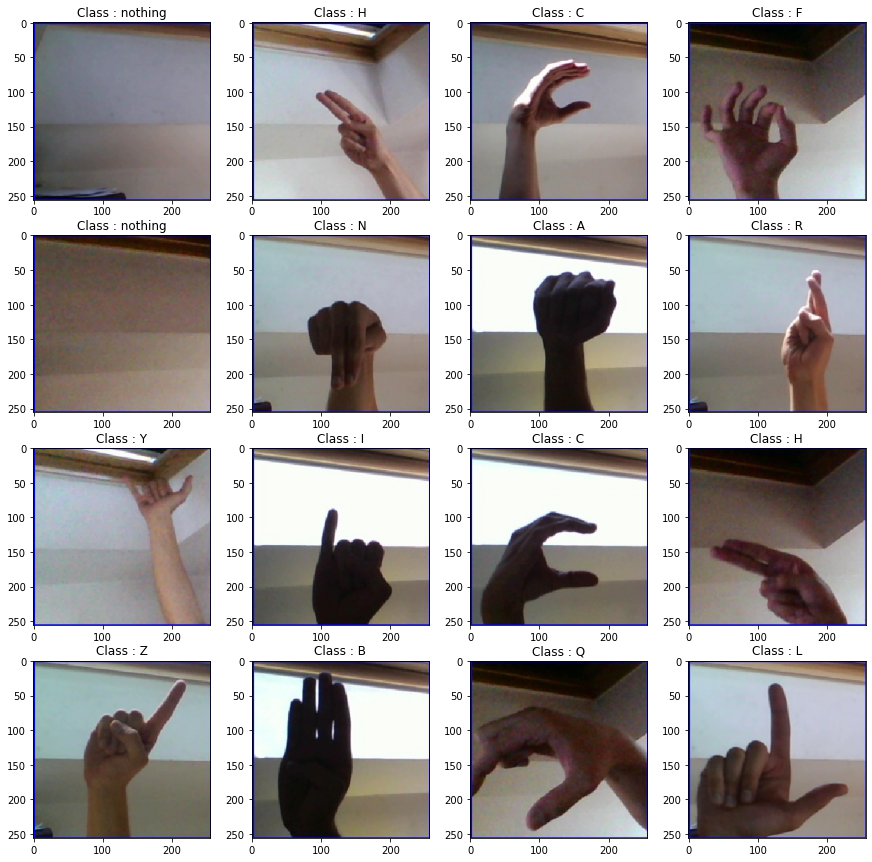

In [11]:
# visualising the batch of train images with labels
fig , ax = plt.subplots(4,4 , figsize = (15,15))
idx = 0
for i in range(0,4):
    temp = idx
    idx = temp
    for j in range(0,4):
        ax[i][j].imshow(img[0][idx])
        ax[i][j].set_title("Class : {}".format(True_label[idx]))
        idx+=1

### Having a look at some of the images from test set

In [13]:
# Selecting images from test set
img_test = []
idx = 0
for image in test_generator:
    img.append(image)
    break

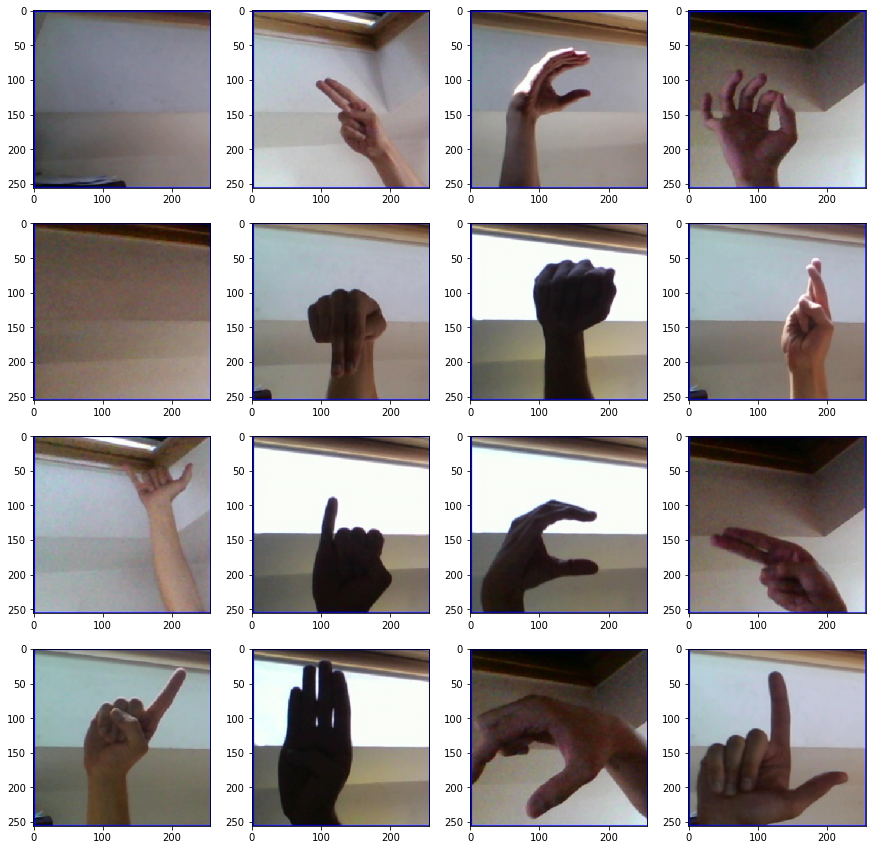

In [14]:
# visualising the batch of test images  
fig , ax = plt.subplots(4,4 , figsize = (15,15))
idx = 0
for i in range(0,4):
    temp = idx
    idx = temp
    for j in range(0,4):
        ax[i][j].imshow(img[0][idx])
        idx+=1